In [1]:
from mls import mls
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_dataset = mls.CustomDataSet("./dataset/processed/test_data.csv")
classes_k = {'Classe A':0,'Classe B':1, 'Classe C':2,'Classe D':3,'Classe E':4}
in_features = len(test_dataset[0][0])
print(in_features)
model = mls.MVC(in_features).double()

312


In [3]:
checkpoint = torch.load('./checkpoints/model_best.checkpoint')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

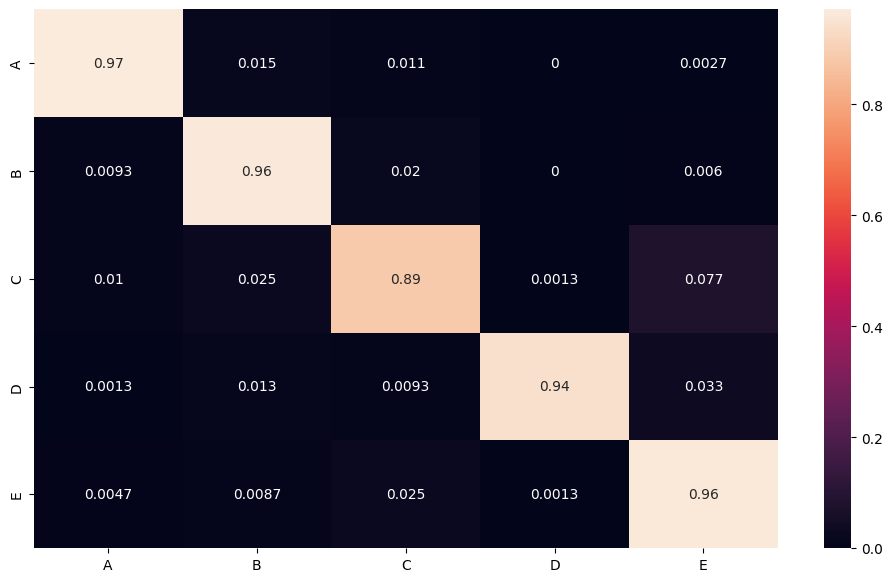

In [5]:
y_pred = []
y_true = []
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=1)
for data, labels in testloader:
    output = model(data)
    y_pred.extend(output.argmax(1).data.cpu().numpy())
    y_true.extend(labels.data.cpu().numpy())

classes = ('A', 'B', 'C', 'D', 'E')
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):0.4f}')

precisions = precision_score(y_true, y_pred, average=None)
print('\nPrecision per Class')
for c, i in classes_k.items():
    print(f'\t{c}: {precisions[i]:0.4f}')

recalls = recall_score(y_true, y_pred, average=None)
print('\nRecall per Class')
for c, i in classes_k.items():
    print(f'\t{c}: {recalls[i]:0.4f}')

f1_scores = f1_score(y_true, y_pred, average=None)
print('\nF1 score per Class')
for c, i in classes_k.items():
    print(f'\t{c}: {f1_scores[i]:0.4f}')

Accuracy: 0.9453

Precision per Class
	Classe A: 0.9746
	Classe B: 0.9396
	Classe C: 0.9314
	Classe D: 0.9972
	Classe E: 0.8905

Recall per Class
	Classe A: 0.9713
	Classe B: 0.9647
	Classe C: 0.8873
	Classe D: 0.9433
	Classe E: 0.9600

F1 score per Class
	Classe A: 0.9730
	Classe B: 0.9520
	Classe C: 0.9088
	Classe D: 0.9695
	Classe E: 0.9240
